In [1]:
# pip install missingno
# pip install pandas
# pip install yahoo-finance
# pip install numpy
# pip install scikit-learn
# pip install kneed

In [2]:
import yahoo_fin.stock_info as si
import pandas as pd
import missingno
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_score



In [3]:
# Extract the nasdaq data from the past 5 years
# Sometimes the code is not correctly working, I guess it's because of the API error. Try to re-run it again.
nasdaq_list = si.tickers_sp500()
nasdaq_historical = {}
for ticker in nasdaq_list:
    nasdaq_historical[ticker] = si.get_data(ticker, start_date="01/01/2019", index_as_date = False, interval="1d")
    print(ticker)
nasdaq_historical

A
AAL
AAP
AAPL
ABBV
ABC
ABMD
ABT
ACN
ADBE
ADI
ADM
ADP
ADSK
AEE
AEP
AES
AFL
AIG
AIZ
AJG
AKAM
ALB
ALGN
ALK
ALL
ALLE
AMAT
AMCR
AMD
AME
AMGN
AMP
AMT
AMZN
ANET
ANSS
AON
AOS
APA
APD
APH
APTV
ARE
ATO
ATVI
AVB
AVGO
AVY
AWK
AXP
AZO
BA
BAC
BALL
BAX
BBWI
BBY
BDX
BEN
BF-B
BIIB
BIO
BK
BKNG
BKR
BLK
BMY
BR
BRK-B
BRO
BSX
BWA
BXP
C
CAG
CAH
CARR
CAT
CB
CBOE
CBRE
CCI
CCL
CDAY
CDNS
CDW
CE
CEG
CF
CFG
CHD
CHRW
CHTR
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COO
COP
COST
CPB
CPRT
CPT
CRL
CRM
CSCO
CSGP
CSX
CTAS
CTLT
CTRA
CTSH
CTVA
CVS
CVX
CZR
D
DAL
DD
DE
DFS
DG
DGX
DHI
DHR
DIS
DISH
DLR
DLTR
DOV
DOW
DPZ
DRI
DTE
DUK
DVA
DVN
DXC
DXCM
EA
EBAY
ECL
ED
EFX
EIX
EL
ELV
EMN
EMR
ENPH
EOG
EPAM
EQIX
EQR
EQT
ES
ESS
ETN
ETR
ETSY
EVRG
EW
EXC
EXPD
EXPE
EXR
F
FANG
FAST
FBHS
FCX
FDS
FDX
FE
FFIV
FIS
FISV
FITB
FLT
FMC
FOX
FOXA
FRC
FRT
FTNT
FTV
GD
GE
GILD
GIS
GL
GLW
GM
GNRC
GOOG
GOOGL
GPC
GPN
GRMN
GS
GWW
HAL
HAS
HBAN
HCA
HD
HES
HIG
HII
HLT
HOLX
HON
HPE
HPQ
HRL
HSIC
HST
HSY
HUM
HWM
IBM
ICE
IDXX
IEX
IFF
ILMN
INCY
INTC
INTU

{'A':           date        open        high         low       close    adjclose  \
 0   2019-01-02   66.500000   66.570000   65.300003   65.690002   63.937435   
 1   2019-01-03   65.529999   65.779999   62.000000   63.270000   61.582008   
 2   2019-01-04   64.089996   65.949997   64.089996   65.459999   63.713573   
 3   2019-01-07   65.639999   67.430000   65.610001   66.849998   65.066513   
 4   2019-01-08   67.589996   68.209999   66.699997   67.830002   66.020348   
 ..         ...         ...         ...         ...         ...         ...   
 959 2022-10-21  126.370003  130.130005  124.820000  129.880005  129.880005   
 960 2022-10-24  131.130005  133.130005  129.809998  132.300003  132.300003   
 961 2022-10-25  132.300003  135.100006  132.300003  134.500000  134.500000   
 962 2022-10-26  134.429993  139.309998  134.000000  137.690002  137.690002   
 963 2022-10-27  137.259995  137.990005  135.384995  136.830002  136.830002   
 
       volume ticker  
 0    2113300      A  

In [4]:
pd.set_option('precision', 4)
data = pd.concat(nasdaq_historical)
data.reset_index(drop=True, inplace=True)
data = data.pivot(index='date', columns='ticker', values = 'adjclose')

In [5]:
# Drop every missing data
missing = data.isnull().mean().sort_values(ascending=False)
drop_list = sorted(list(missing[missing > 0.1].index))
data.drop(labels=drop_list, axis=1, inplace=True)

In [6]:
# fill with last data
data = data.fillna(method='ffill')
data

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,63.9374,31.9632,150.2818,38.1683,73.5005,70.0189,309.96,65.1867,133.1600,224.57,...,100.2505,43.5790,56.2542,36.6291,63.5515,85.5389,96.5442,156.24,37.2912,82.5800
2019-01-03,61.5820,29.5817,154.9734,34.3665,71.0788,69.0032,302.29,62.1102,128.6137,215.70,...,99.2807,43.4073,55.3904,36.6485,61.3729,83.3874,94.7980,146.88,37.0849,79.7256
2019-01-04,63.7136,31.5302,151.1288,35.8336,73.3687,69.8026,313.44,63.8829,133.6146,226.19,...,103.2849,43.8320,57.4327,37.7118,63.9623,85.5576,98.0356,152.97,38.2240,82.8537
2019-01-07,65.0665,32.4257,153.3461,35.7538,74.4396,70.3010,314.80,64.8396,134.0787,229.26,...,105.1190,43.6422,57.7313,38.3886,63.0164,85.4641,98.0734,155.29,38.3764,83.3522
2019-01-08,66.0203,31.9041,152.2802,36.4354,74.7855,71.0534,318.42,64.0611,137.4695,232.68,...,108.4127,44.1483,58.1511,38.1275,63.6088,85.2957,95.8741,156.33,38.7262,84.5936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-21,129.8800,13.7100,171.3400,147.2700,147.0600,147.7300,256.22,95.0600,269.5700,306.37,...,58.8000,60.9000,105.8600,29.0600,93.8600,111.0300,107.3900,263.04,47.8200,147.2100
2022-10-24,132.3000,14.1000,176.6200,149.4500,150.8900,150.1000,260.28,98.2900,275.3100,316.22,...,56.5300,61.5800,106.6000,29.5100,96.0000,108.7700,109.0300,265.72,49.7800,149.3700
2022-10-25,134.5000,14.2900,181.4000,152.3400,149.8200,152.7700,264.29,97.9500,280.6100,323.79,...,57.4400,62.4000,105.8800,30.3100,98.2200,111.2400,110.7300,274.58,51.5100,152.3000


In [8]:
# Start the calculation 
# 252 trading days in a year

returns = data.pct_change().mean()*252
returns = pd.DataFrame(returns)
returns.columns = ['returns']

returns['volatility'] = data.pct_change().std()*np.sqrt(252)
data = returns
data.head()

,returns,volatility
ticker,,
A,0.2436,0.2978
AAL,0.0058,0.6709
AAP,0.1188,0.3456
AAPL,0.4100,0.3414
ABBV,0.2291,0.2704


In [9]:
scale = StandardScaler().fit(data)

#Fit the scaler
scaled_data = pd.DataFrame(scale.fit_transform(data),columns = data.columns, index = data.index)
X = scaled_data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


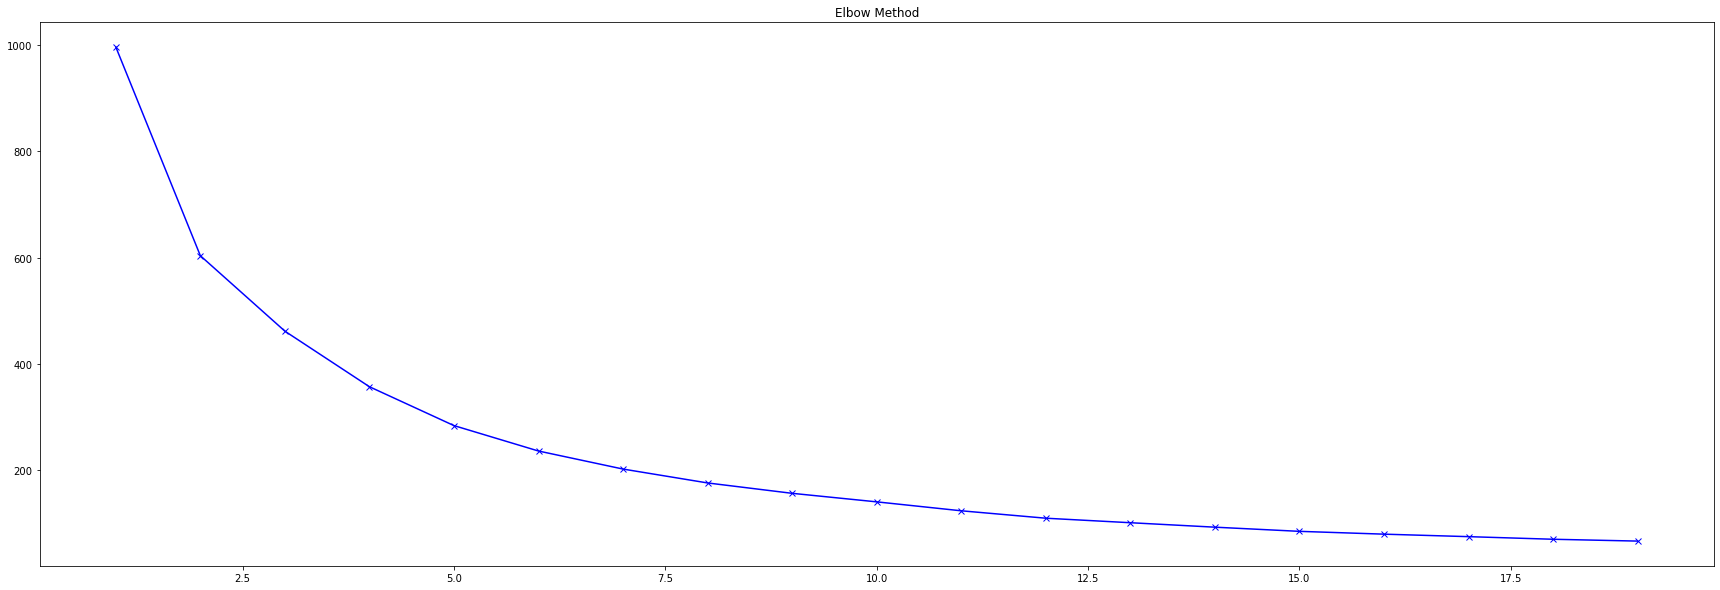

In [10]:
# Use Elbow method to determine the K value
K = range(1,20)
distortions = []
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize= (30,10))
plt.plot(K, distortions, 'bx-')
plt.title('Elbow Method')
plt.show()

In [11]:
# We know the K-value we should use
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
# Save the number of clusters using b
a=kl.elbow
a

5

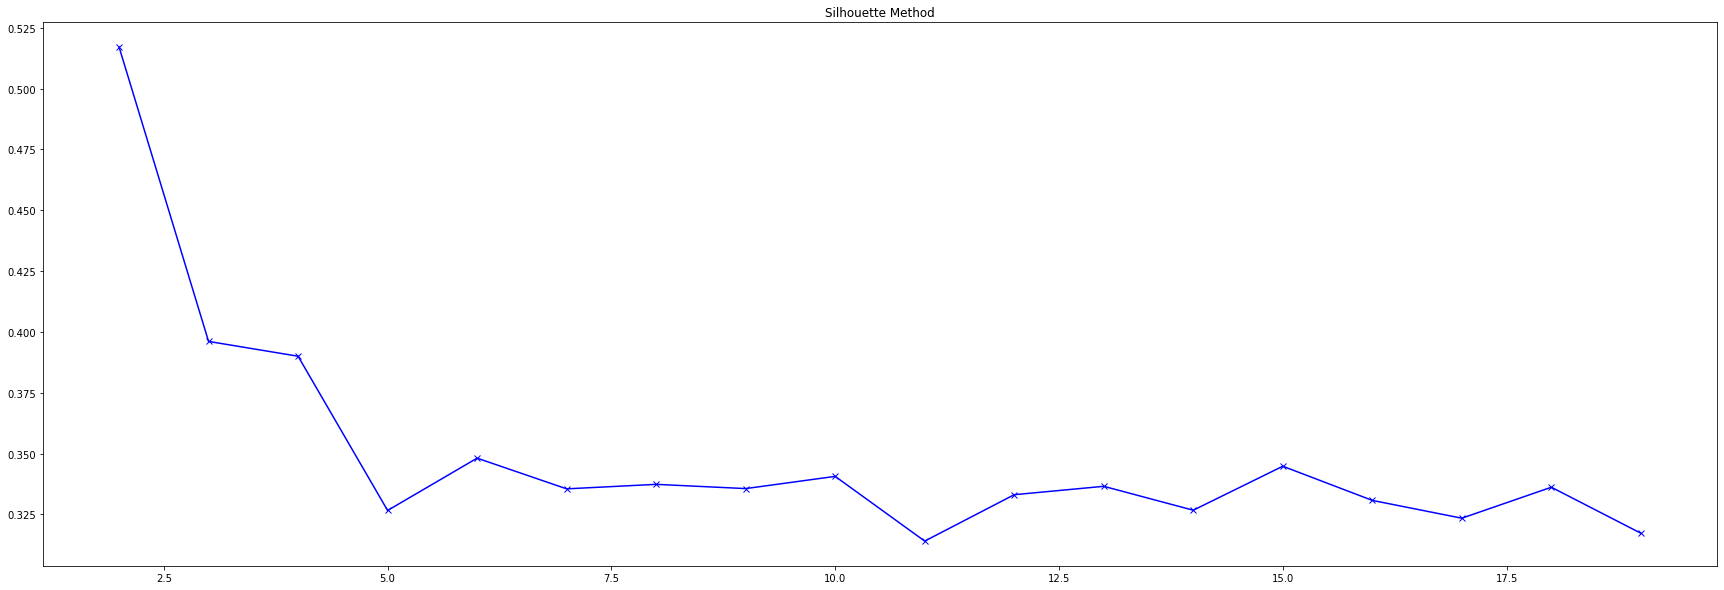

5

In [12]:
# Use Silhouette method to determine the K value
K = range(2,20)
silhouettes = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='random')
    kmeans.fit(X)
    silhouettes.append(silhouette_score(X, kmeans.labels_))
fig = plt.figure(figsize= (30,10))
plt.plot(K, silhouettes, 'bx-')
plt.title('Silhouette Method')
plt.show()

kl = KneeLocator(K, silhouettes, curve="convex", direction="decreasing")
# Save the number of clusters using b
b=kl.elbow
b

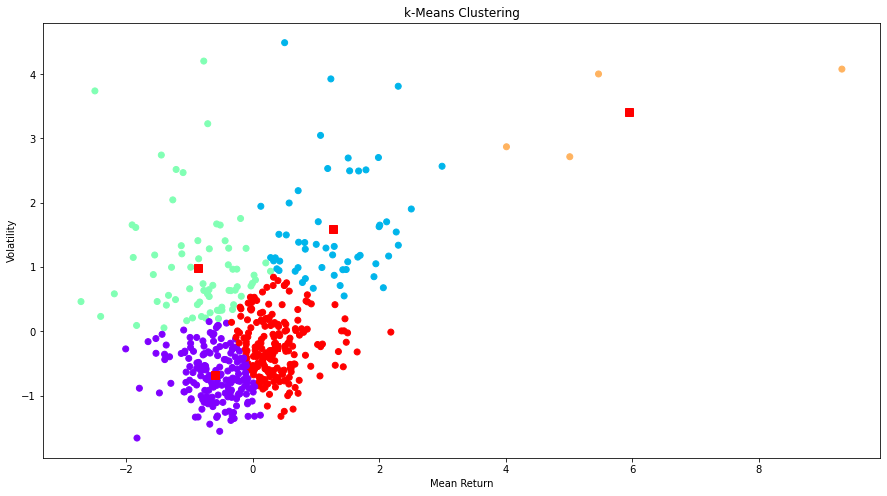

In [19]:
# Apply the K-means model for the silhoutte
k_means = KMeans(n_clusters=a)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Clustering')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.plot(centroids[:,0],centroids[:,1],'rs',markersize=8)
plt.show()

<ipython-input-21-8f2375298d8a>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


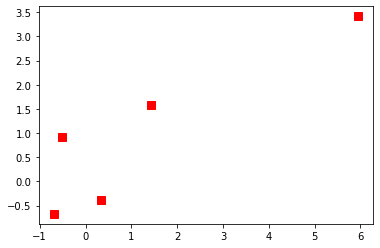

In [21]:
# Apply the K-means model for the elbow
k_means = KMeans(n_clusters=b)
k_means.fit(X)
prediction = k_means.predict(X)

#Plot the results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label = X.index)
ax.set_title('k-Means Clustering')
ax.set_xlabel('Mean Return')
ax.set_ylabel('Volatility')
plt.plot(centroids[:,0],centroids[:,1],'rs',markersize=8)
plt.show()

In [ ]:
clustered_groups = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_groups_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_groups = clustered_groups[clustered_groups != -1]
plt.barh(range(len(clustered_groups.value_counts())),clustered_groups.value_counts())
plt.title('Clustering results')
plt.xlabel('Number of stocks belong to the same group')
plt.ylabel('Cluster Index')
plt.show()